## Titanic Survivor Data

### Features
Age, Sex, Pclass, Ticket Number/fare, Sibsp, Parch, Embarked

### Questions? 
* Embarked correlated with class? 
* What percentage of male or female survived? 
* Is age correlated with survival of passengers? 
* Higher survival for female with children than without children? 


In [50]:
# Logistic Regression Classification for Titanic Problem
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sn
# from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [51]:
# Import Training Titanic Data
df_train = pd.read_csv('train.csv')
enc_s = LabelEncoder()
enc_e = LabelEncoder()
df_train['Sexn'] = enc_s.fit_transform(df_train['Sex'])
df_train['Embarkedn'] = enc_e.fit_transform(df_train['Embarked'].astype(str))
print(df_train[df_train.Embarked.isnull()==True])
#df_train[df_train.Age.isnull()==True]

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  Sexn  Embarkedn  
61   female  38.0      0      0  113572  80.0   B28      NaN     0          3  
829  female  62.0      0      0  113572  80.0   B28      NaN     0          3  


In [52]:
# Import Testing Titanic Data
df_test = pd.read_csv('test.csv')
enc_ts = LabelEncoder()
enc_te = LabelEncoder()
df_test['Sexn'] = enc_ts.fit_transform(df_test['Sex'])
df_test['Embarkedn'] = enc_te.fit_transform(df_test['Embarked'].astype(str))



In [53]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sexn,Embarkedn
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,1.538721
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.794231
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,2.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000


In [54]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Sexn           891
Embarkedn      891
dtype: int64

In [55]:
# Imputation of Age Data 

df_train['Age'] = df_train['Age'].fillna(df_train.Age.mean())


# Imputation of Embarked Data
print(df_train.Embarkedn.mode()[0])
df_train['Embarkedn'] = df_train['Embarkedn'].fillna(df_train.Embarkedn.mode()[0])


2


In [56]:
df_test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
Sexn           418
Embarkedn      418
dtype: int64

In [57]:
# Imputation of Age Data 
df_test['Age'] = df_test['Age'].fillna(df_test.Age.mean())

# Imputation of Embarked Data
mode_fare_pclass_3 = df_test['Fare'][df_test.Pclass==3].mode()[0]
print(mode_fare_pclass_3)
df_test['Fare']  = df_test['Fare'].fillna(mode_fare_pclass_3)
print(df_test[pd.isnull(df_test['Fare'])])

7.75
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Sexn, Embarkedn]
Index: []


# Personal Rant about Titanic Data
* PassengerId is the index of the data set starting from one.
* Survived is the Response Variable
* Age and Fare are Continuous variables
    * About 177 Age variable values are missing
* SibSp, Parch, Sex and Embarked are categorical variables


In [58]:
# Features which are missing 
feature = 'Embarkedn'
print(len(df_train[feature]))

# Print 
new = df_train[feature][pd.isna(df_train[feature])]
#print(new.values)

# Remove the rows where NaN is there in 'Age' Column
df_train = df_train.dropna(axis=0, subset=['Age'])

print(len(df_train[feature]))


891
891


## Any trend 

[]

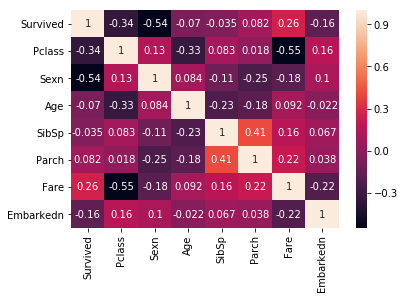

In [59]:
# Plot Heat map of Correlation
Train_val = df_train[['Survived', 'Pclass', 'Sexn', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarkedn']]
sn.heatmap(Train_val.corr(), annot=True)
plt.plot()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Sex, dtype: int64


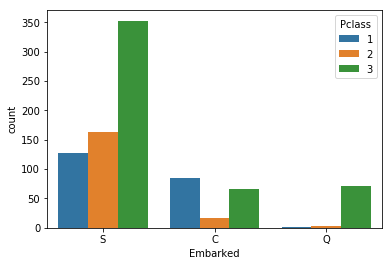

In [60]:
# Groupby Embarked and Class

embark = df_train.groupby(['Embarked','Pclass'])
print(embark['Sex'].agg('count'))
sn.countplot(x='Embarked', hue='Pclass', data = df_train)
plt.show()

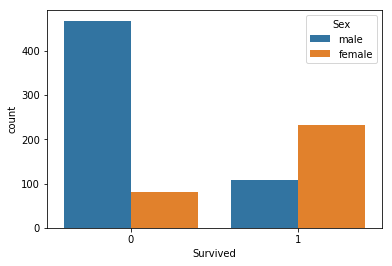

In [61]:
# Groupby Survival and Sex
class_survival = df_train.groupby(['Survived','Sex'])
# Plot Seaborn Count Plot
sn.countplot(x='Survived', hue='Sex', data = df_train)
plt.show()

## Some info on the numbers displayed above

* The number of females who travelled aboard the titanic was below 50% of the number of males who travelled.
* Even though the number of females were significantly less than the number of males, the count of females who survived the disaster were more than the number of males.  


In [62]:
# Groupby Survived and Class

embark = df_train.groupby(['Survived','Pclass'])
print(embark['Survived'].agg('count'))


Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64


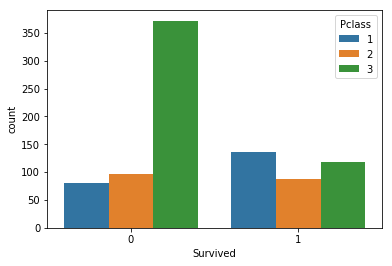

In [63]:
# Plot Seaborn Count Plot
sn.countplot(x='Survived', hue='Pclass', data = df_train)
plt.show()

In [64]:
# Group by age range
def convert_ages(df):
    """ 
    Convert ages in a dataframe df
    """
    def age_groups(age):
        if(age > 0 and age <= 10):
            return 'Child'
        elif(age > 10 and age <= 20):
            return 'Teen'
        elif(age > 21 and age <= 30):
            return 'Adult-20s'
        elif(age > 31 and age <= 40):
            return 'Adult-30s'
        elif(age > 41 and age <= 50):
            return 'Adult-40s'
        elif(age > 51 and age <= 60):
            return 'Adult-50s'
        elif(age > 60):
            return 'Adult > 60'
        elif(age == 'NaN'):
            return 'Age not given'
        
    age_category = df['Age'].apply(age_groups)
    return age_category

df_train['Age_Group'] = convert_ages(df_train)

Survived  Age_Group 
0         Adult > 60     17
          Adult-20s     251
          Adult-30s      75
          Adult-40s      47
          Adult-50s      20
          Child          26
          Teen           71
1         Adult > 60      5
          Adult-20s     131
          Adult-30s      61
          Adult-40s      31
          Adult-50s      15
          Child          38
          Teen           44
Name: Survived, dtype: int64


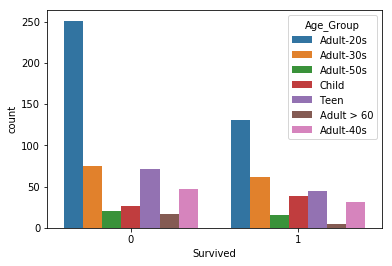

In [65]:
# Groupby Age Group
ages = df_train.groupby(['Survived','Age_Group'])
print(ages['Survived'].agg('count'))

sn.countplot(x='Survived', hue='Age_Group', data = df_train)
plt.show()

In [66]:
# Group by Parch
par_ch = df_train.groupby(['Survived','Parch'])
print(par_ch['Survived'].agg('count'))


Survived  Parch
0         0        445
          1         53
          2         40
          3          2
          4          4
          5          4
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Survived, dtype: int64


In [67]:
# Group by SibSp
sib_sp= df_train.groupby(['Survived','SibSp'])
print(sib_sp['Survived'].agg('count'))


Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: Survived, dtype: int64


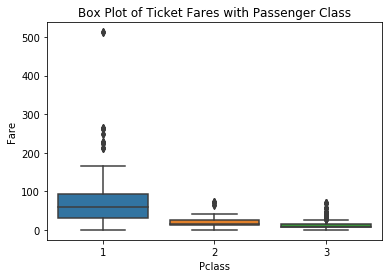

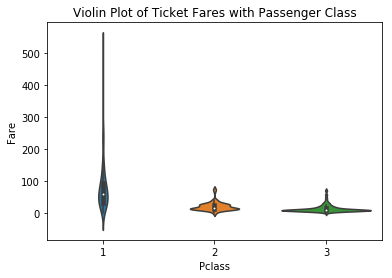

In [68]:

plt.figure()
sn.boxplot(x='Pclass', y='Fare', data=df_train)
plt.title('Box Plot of Ticket Fares with Passenger Class')

plt.figure()
sn.violinplot(x='Pclass', y='Fare', data=df_train)
plt.title('Violin Plot of Ticket Fares with Passenger Class')
plt.show()



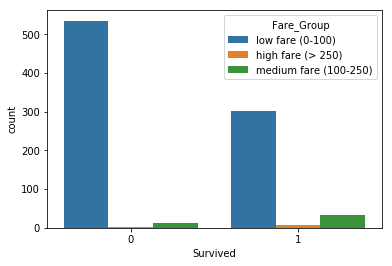

In [69]:
# Group by Fare

def convert_fares(df):
    def fare_groups(value):
        if(value >= 0.0 and value <= 100.0):
            return 'low fare (0-100)'
        elif(value > 100.0 and value <= 250):
            return 'medium fare (100-250)'
        elif(value > 250.0):
            return 'high fare (> 250)'
    fare_category = df['Fare'].apply(fare_groups)
    return fare_category

df_train['Fare_Group'] = convert_fares(df_train)
sn.countplot(x='Survived', hue='Fare_Group', data = df_train)
plt.show()  

In [70]:
# Group by Survived
fares= df_train.groupby(['Survived'])
print(fares['Fare'].agg(['min', 'max', 'mean']))


          min       max       mean
Survived                          
0         0.0  263.0000  22.117887
1         0.0  512.3292  48.395408


In [71]:
# Group  dataframe by Pclass
pg_class = df_train.groupby(['Pclass'])
print(pg_class['Fare'].agg(['min', 'max', 'mean']))


        min       max       mean
Pclass                          
1       0.0  512.3292  84.154687
2       0.0   73.5000  20.662183
3       0.0   69.5500  13.675550


In [72]:
# Group by Fare Group
fare_agg= df_train.groupby(['Fare_Group'])
print(fare_agg['Fare'].agg(['min', 'max', 'mean']))


                           min       max        mean
Fare_Group                                          
high fare (> 250)      262.375  512.3292  345.970844
low fare (0-100)         0.000   93.5000   22.411942
medium fare (100-250)  106.425  247.5208  154.522816


In [73]:
df_train[df_train['Fare'] ==df_train['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sexn,Embarkedn,Age_Group,Fare_Group
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,0,0,Adult-30s,high fare (> 250)
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,0,Adult-30s,high fare (> 250)
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,0,Adult-30s,high fare (> 250)


In [74]:
df_train[df_train['Fare'] == 0.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sexn,Embarkedn,Age_Group,Fare_Group
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,NaN,S,1,2,Adult-30s,low fare (0-100)
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S,1,2,Adult-30s,low fare (0-100)
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,NaN,S,1,2,Adult-20s,low fare (0-100)
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,NaN,S,1,2,Adult-20s,low fare (0-100)
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,NaN,S,1,2,Teen,low fare (0-100)
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,NaN,S,1,2,Adult-20s,low fare (0-100)
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,NaN,S,1,2,Adult-20s,low fare (0-100)
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,NaN,S,1,2,Adult-20s,low fare (0-100)
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,NaN,S,1,2,Adult-40s,low fare (0-100)
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,NaN,S,1,2,Adult-20s,low fare (0-100)


In [75]:
# Training Data and Testing Data
X_train = df_train[[ 'Pclass', 'Sexn', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarkedn']]
# X_train = X_train.dropna(axis=0, subset=['Age'])
y_train = df_train['Survived']
X_train.head()

,Pclass,Sexn,Age,SibSp,Parch,Fare,Embarkedn
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [76]:
# Testing Data

X_test = df_test[[ 'Pclass', 'Sexn', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarkedn']]
X_test.count()

Pclass       418
Sexn         418
Age          418
SibSp        418
Parch        418
Fare         418
Embarkedn    418
dtype: int64

In [77]:
# Principal Component Analysis
from sklearn.decomposition import PCA
X_train_np = X_train.as_matrix
pca = PCA(n_components=3, svd_solver='randomized')
pca.fit(X_train)
X_tr_pca = pca.transform(X_train)
print(pca.explained_variance_ratio_)

[9.35408717e-01 6.34734709e-02 4.82654790e-04]


In [78]:
# Number of unique values in Passenger Id
df_train['PassengerId'].nunique()

891

In [79]:
X_tr_pca

array([[-2.51505366e+01, -7.06747764e+00,  2.93532224e-01],
       [ 3.92960638e+01,  7.30466203e+00, -2.23255681e-02],
       [-2.43747835e+01, -3.07046895e+00, -4.43025170e-01],
       ...,
       [-8.75036472e+00,  1.79618780e-01,  1.30795826e+00],
       [-2.28458986e+00, -3.59837956e+00, -1.12950803e+00],
       [-2.43937602e+01,  2.93301680e+00, -4.83766037e-01]])

In [91]:
# Use Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

Xn_train, Xn_test, yn_train, yn_test =  train_test_split(X_train, y_train)

# use a full grid over all parameters
clf = RandomForestClassifier(n_estimators=20)
# clf = RandomForestClassifier(n_jobs=-1, max_features='sqrt', oob_score = True)
param_grid = {"max_depth": [3, None],
              "max_features": [3, 5, 7],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
#param_grid = { 
#           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
#           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
#           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]
#}

grid_search = GridSearchCV(clf, param_grid=param_grid)



grid_search.fit(Xn_train, yn_train)
#print(grid_search.cv_results_)

prediction = grid_search.predict(Xn_test)
print(classification_report(yn_test, prediction))

             precision    recall  f1-score   support

          0       0.86      0.89      0.88       138
          1       0.81      0.76      0.79        85

avg / total       0.84      0.84      0.84       223

